# Figure - landcover influence

This notebook explores the relationship between landcover and the sound exposure level (SEL).

#### Import Statements

In [1]:
import pandas
import numpy
from matplotlib import pyplot
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['font.sans-serif']

['Bitstream Vera Sans',
 'DejaVu Sans',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

In [3]:
rcParams['font.sans-serif'] = ['Helvetica',
                               'Arial',
                               'Bitstream Vera Sans',
                               'DejaVu Sans',
                               'Lucida Grande',
                               'Verdana',
                               'Geneva',
                               'Lucid',
                               'Avant Garde',
                               'sans-serif']

#### Data sources

In [4]:
data = pandas.read_csv("/home/ubuntu/data/dataset.csv")
data = data[data.site <= 30]

In [5]:
#sel = data[['site', 'building_100m', 'pavement_100m', 'field_100m', 'land_composite_500m', 'sel']].groupby('site').mean()
#sel.sort_values(by=['pavement_100m', 'building_100m', 'field_100m'], ascending=False, inplace=True)

sel = data[['site', 'building_500m', 'pavement_500m', 'forest_500m', 'sel']].groupby('site').mean()
sel['land_composite_500m'] = (sel.forest_500m - (sel.building_500m + sel.pavement_500m)) / (sel.forest_500m + sel.building_500m + sel.pavement_500m)
sel.sort_values(by=['land_composite_500m'], inplace=True)

In [6]:
landcover = pandas.read_csv("/home/ubuntu/data/landcover/landcover_areas.csv")
#landcover = landcover[landcover.IncludedArea == '100m']
landcover = landcover[landcover.IncludedArea == '500m']
landcover = landcover[landcover.SiteID <= 30]
landcover.set_index('SiteID', drop='False', inplace=True)
landcover.sort_index(inplace=True)

In [7]:
landcover = sel.join(landcover)

In [8]:
colors = pandas.read_csv("/home/ubuntu/data/landcover/landcover_types.csv").set_index('ID')
site_names = data.sort_values(by='site').site_name.unique()
#full_area = 31026.628684
full_area = 775665.717

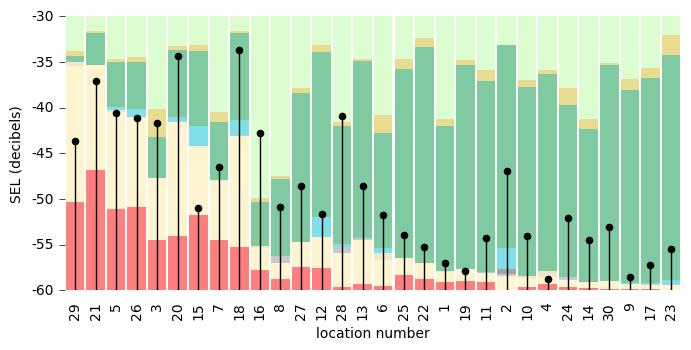

In [9]:
figure, ax = pyplot.subplots()
figure.subplots_adjust(left=0.1, bottom=0.15, right=1, top=0.95, wspace=0, hspace=0)

figure.set_figheight(6.85 / 2)
figure.set_figwidth(6.85)

#ax = pyplot.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)


bar_width = 0.9
ID = numpy.array([ n for n in range(len(landcover)) ])
SiteIDs = sel.index
left = ID + 0.05
height = numpy.zeros(len(landcover))
bottom = numpy.zeros(len(landcover))
for index, column in landcover.ix[:,'1':'15'].iteritems():
    height = (column.as_matrix() / full_area) * 100
    ax.bar(left=left, 
            height=height, 
            bottom=bottom,
            width=bar_width,
            color=colors['Color'][int(index)],
            edgecolor=None,
            linewidth=0,
            alpha=0.5)
    bottom = bottom + height

# format
ax.set_xlim(0, 30)
ax.set_ylim(0, 100)
ax.set_xlabel('location number')
ax.set_ylabel('SEL (decibels)')
xticks = ID + 0.5
xticklabels = [site_names[n - 1] for n in SiteIDs]
#xticklabels = [ "{0} - {1}".format(xticklabels[i], SiteIDs[i]) for i in ID ]
xticklabels = [ "{0}".format(SiteIDs[i]) for i in ID ]
t = ax.set_xticks(xticks)
tl = ax.set_xticklabels(xticklabels, rotation='vertical')
ax.set_frame_on(False)

# title formatting
title_font = {
    'size': 12.0,
    'weight': 'bold'
}

# formatting
ax.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=True, labelleft=True, direction='out')

y = sel['sel']
ymin = numpy.around(y.min() - 5, decimals=-1)
y_zeroed = y - ymin
ymax = numpy.around(y_zeroed.max() + 5, decimals=-1)
y_trans = (y_zeroed / ymax) * 100

yticks = numpy.arange(ymin, numpy.around(y.max() + 5, decimals=-1) + 5, 5)
yticks_trans = [((n - yticks.min()) /  (yticks.max() - yticks.min())) * 100 for n in yticks]
yticklabels = ["{0:.0f}".format(n) for n in yticks]
t = ax.set_yticks(yticks_trans)
tl = ax.set_yticklabels(yticklabels)

ax.scatter(numpy.arange(0, 30, 1) + 0.5, y_trans, c='black', zorder=2)
for n, i in enumerate(landcover.index):
    ax.add_line(Line2D([xticks[n], xticks[n]], [min(yticks_trans), y_trans[i]], color='black'))

In [10]:
figure.savefig("/home/ubuntu/download/figure7a.tiff", dpi=150)

In [11]:
biophony = data[['site', 'building_500m', 'pavement_500m', 'forest_500m', 'biophony']].groupby('site').mean()
biophony['land_composite_500m'] = (biophony.forest_500m - (biophony.building_500m + biophony.pavement_500m)) / (biophony.forest_500m + biophony.building_500m + biophony.pavement_500m)
biophony.sort_values(by=['land_composite_500m'], inplace=True)

In [12]:
landcover = pandas.read_csv("/home/ubuntu/data/landcover/landcover_areas.csv")
landcover = landcover[landcover.IncludedArea == '500m']
landcover = landcover[landcover.SiteID <= 30]
landcover.set_index('SiteID', drop='False', inplace=True)
landcover.sort_index(inplace=True)

In [13]:
landcover = biophony.join(landcover)

In [14]:
full_area = 775665.717

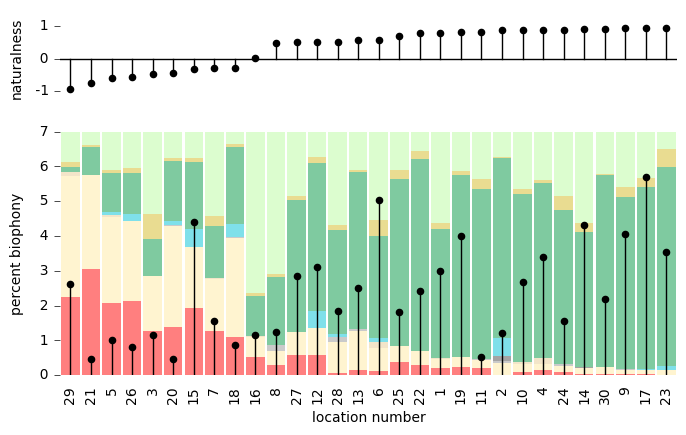

In [15]:
figure = pyplot.figure()
figure.subplots_adjust(left=0.1, bottom=0.15, right=1, top=0.95, wspace=0, hspace=0)

figure.set_figheight(6.85 / 1.5)
figure.set_figwidth(6.85)

ax_a = pyplot.subplot2grid((30, 1), (0, 0), rowspan=8, colspan=1)
ax_b = pyplot.subplot2grid((30, 1), (10, 0), rowspan=20, colspan=1, sharex=ax_a)

ID = numpy.array([ n for n in range(len(landcover)) ])
xticks = ID + 0.5

# naturalness
ax_a.scatter(xticks, biophony.land_composite_500m, c='black')
for n, i in enumerate(landcover.index):
    ax_a.add_line(Line2D([xticks[n], xticks[n]], [biophony.land_composite_500m[i], 0], color='black'))
#ax_a.bar(left=range(0, len(landcover), 1), height=biophony.land_composite_500m, color='black')
ax_a.set_frame_on(False)

ax_a.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=False, labelleft=True, direction='out')

ax_a.add_line(Line2D([0, len(landcover)], [0, 0], color='black'))

ax_a.set_yticks([-1, 0, 1])
ax_a.set_yticklabels([' -1', '  0', '  1'])
ax_a.set_ylabel('naturalness')

# naturalness vs. percent biophony
bar_width = 0.9
SiteIDs = biophony.index
left = ID + 0.05
height = numpy.zeros(len(landcover))
bottom = numpy.zeros(len(landcover))
for index, column in landcover.ix[:,'1':'15'].iteritems():
    height = (column.as_matrix() / full_area) * 100
    ax_b.bar(left=left, 
            height=height, 
            bottom=bottom,
            width=bar_width,
            color=colors['Color'][int(index)],
            edgecolor=None,
            linewidth=0,
            alpha=0.5)
    bottom = bottom + height

# format
ax_b.set_xlim(0, 30)
ax_b.set_ylim(0, 100)
ax_b.set_xlabel('location number')
ax_b.set_ylabel('percent biophony')
xticklabels = [site_names[n - 1] for n in SiteIDs]
#xticklabels = [ "{0} - {1}".format(xticklabels[i], SiteIDs[i]) for i in ID ]
xticklabels = [ "{0}".format(SiteIDs[i]) for i in ID ]
t = ax_b.set_xticks(xticks)
tl = ax_b.set_xticklabels(xticklabels, rotation='vertical')
ax_b.set_frame_on(False)

# title formatting
title_font = {
    'size': 12.0,
    'weight': 'bold'
}

# formatting
ax_b.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=True, labelleft=True, direction='out')

y = biophony['biophony']
ymin = numpy.around(y.min() - 1)
y_zeroed = y - ymin
ymax = numpy.around(y_zeroed.max() + 1)
y_trans = (y_zeroed / ymax) * 100

ax_b.scatter(numpy.arange(0, 30, 1) + 0.5, y_trans, c='black', zorder=2)
for n, i in enumerate(landcover.index):
    ax_b.add_line(Line2D([xticks[n], xticks[n]], [min(yticks_trans), y_trans[i]], color='black'))
    
yticks = numpy.arange(ymin, numpy.around(y.max()) + 1, 1)
yticks_trans = [((n - yticks.min()) /  (yticks.max() - yticks.min())) * 100 for n in yticks]
yticklabels = ["  {0:.0f}".format(abs(n)) for n in yticks]
#yticklabels[len(yticklabels)- 1] = ' '
t = ax_b.set_yticks(yticks_trans)
tl = ax_b.set_yticklabels(yticklabels)

In [16]:
figure.savefig("/home/ubuntu/download/figure7b.tiff", dpi=150)